## Section 1 : Read input data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

# Set default fontsize for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

In [2]:
# Read the input training and test data

input_data_path = os.path.join("C:\Study\DataSets\\telco-customer-churn", "WA_Fn-UseC_-Telco-Customer-Churn.csv")
train_data = pd.read_csv(input_data_path)
train_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1898,6689-TCZHQ,Female,1,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.95,378.4,Yes
4920,0264-CNITK,Female,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.10,1389.6,No
1113,7627-JKIAZ,Female,0,Yes,No,37,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),78.95,2839.65,Yes
5154,9874-QLCLH,Female,0,Yes,Yes,17,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,1743.5,Yes
2171,3995-WFCSM,Female,0,No,No,2,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,60.85,111.4,No


### Section 2 : Prepare data for analysis: Explore data
In this section, we will perform:
1. Basic statistical analysis of the data.
2. Explore each feature.
3. Analyse relationship of the independent and dependent feature through visualisation.

In [3]:
# Total number of records
print("Total number of records in training dataset:", train_data.shape)

Total number of records in training dataset: (7043, 21)


In [4]:
# What are the features available and what are their data type?
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Descriptive statistics of training data
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
# Is there any empty data in training dataset?
train_data.isnull().sum()/train_data.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### Observations so far:
1. There are 7043 records in the dataset.
2. There are 21 features in the dataset - "Churn" is the target/dependent variable (this is what we will try to predict), and rest 30 are independent variables which we need to explore further.
3. Only 3 features are numeric - "SeniorCitizen" (categorical), and "tenure" and "MonthlyCharges" (continuous).
4. Datatype of the rest of the features is object, looking at the sample data they look like to be of type string. Some of these features are categorical, which we will map into numerical values.
5. There is absolutely NO missing data. This is amazing!

### Now, let's explore each feature in more detail.

### customerID
Alpha-numeric value representing the ID of each customer. Since this is unique for all 7043 records, we can ignore this feature.

In [7]:
print("Total number of unique customerID values =", len(train_data.customerID.unique()))

Total number of unique customerID values = 7043


### Churn
Did the customer leave the CSP or not?

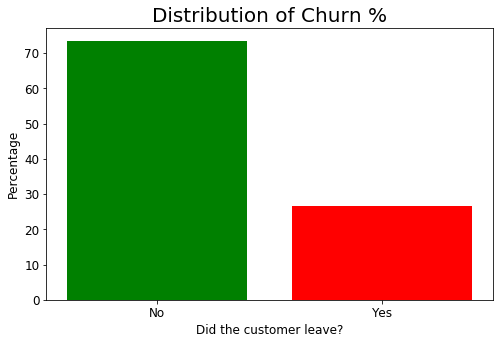

In [8]:
fig, axes = plt.subplots(figsize=(8,5))
data = train_data["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

#### Observations:
* In the dataset provided, close to 30% customers churned, while the rest remained with the service provider.
* In order to make analysis easier in this section, we will add a new column with numerical value of "Churn" right now.

In [9]:
# Create column ChurnVal with - Yes = 1 and No = 0
churn_mapping = {"No": 0, "Yes": 1}
train_data['ChurnVal'] = train_data['Churn'].map(churn_mapping)

### Gender
What is the gender distribution and how is gender related to churn?

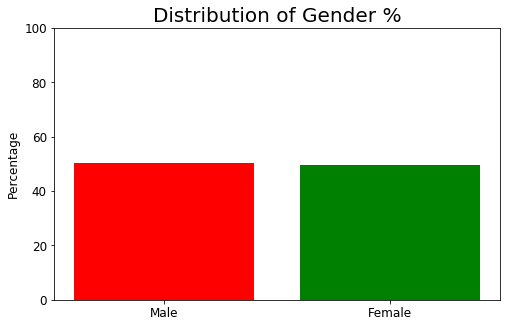

In [18]:
fig, axes1 = plt.subplots(figsize=(8,5))

# Plot distribution of gender data
data = train_data["gender"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Gender %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

plt.show()

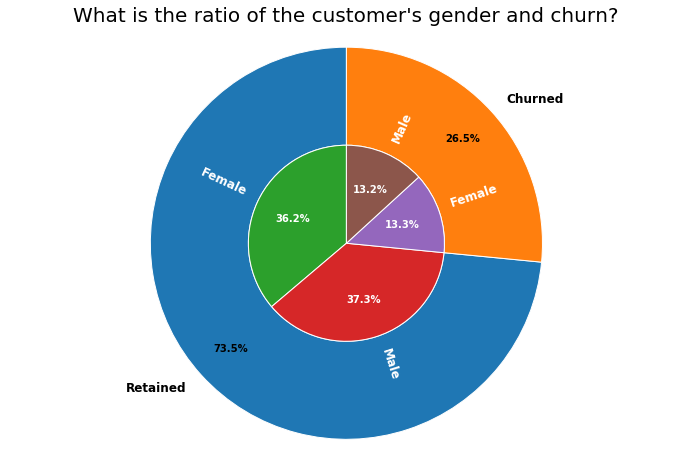

In [34]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = train_data.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = train_data.groupby(["Churn", "gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

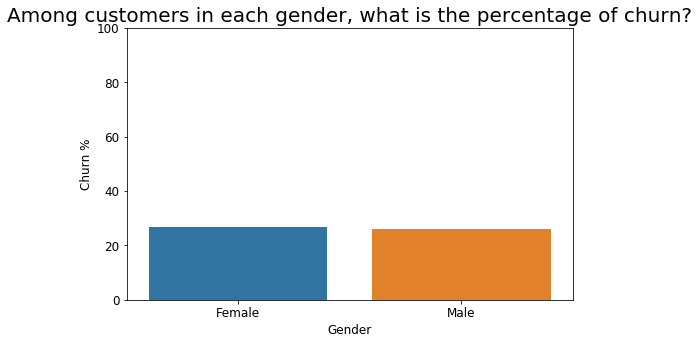

In [29]:
fig, axes3 = plt.subplots(figsize=(8,5))

# Chances of churn based on gender
sns.barplot(x="gender", y=train_data["ChurnVal"]*100, data=train_data, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('Among customers in each gender, what is the percentage of churn?')
axes3.set_ylim(0,100)
plt.show()

#### Observations:
* The dataset has almost equal distribution of male and female customers.
* Both in the churned or retained category - percentage of males and females are almost equally distributed.
* Out of all male customers, approx 26% churned. While among females, the churn percentage is approx 27%. Both are almost at equal level.
* It can be concluded that probability of churn does not depend of gender of the customer. 

#### SeniorCitizen
Flag indicating is the customer is senior citizen or not.

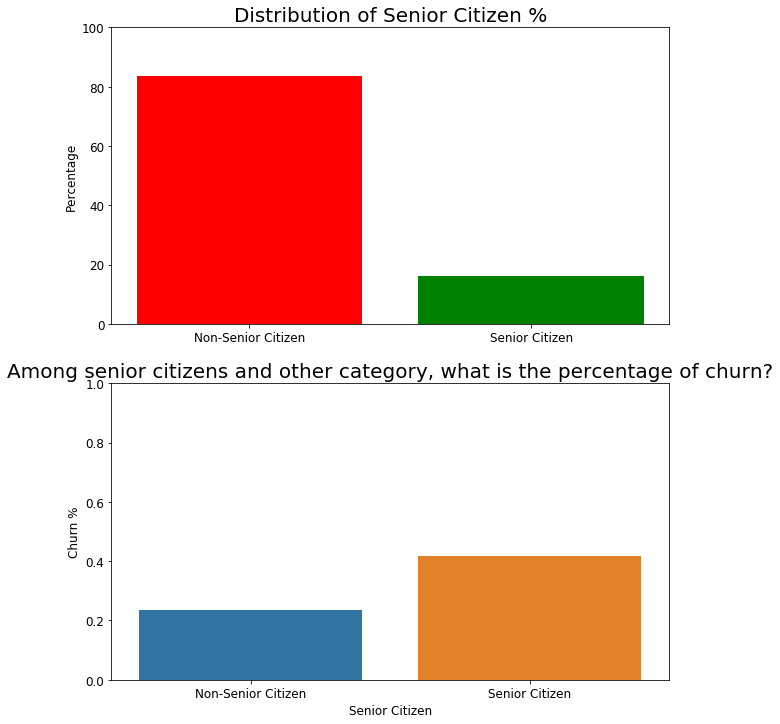

In [44]:
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(10,12))

# Plot distribution of SeniorCitizen data
data = train_data["SeniorCitizen"].value_counts(normalize=True).sort_index()
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Senior Citizen %')
axes1.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes1.set_ylim(0,100)

# Chances of churn based on gender
sns.barplot(x="SeniorCitizen", y="ChurnVal", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Senior Citizen')
axes2.set_ylabel('Churn %')
axes2.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes2.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes2.set_ylim(0,1)

plt.show()

#### Observations:
* Majority of the customers in dataset are Non-Senior Citizens (> 80%).
* Out of all senior citizen customers, more than 40% churned. While among younder customers, the churn percentage is less than 25%.
* Hence, senior citizens tend to churn more than younger customers.
* Thus, SeniorCitizen and Churn features seem to be related. 

### Partner
Does the customer have a partner?

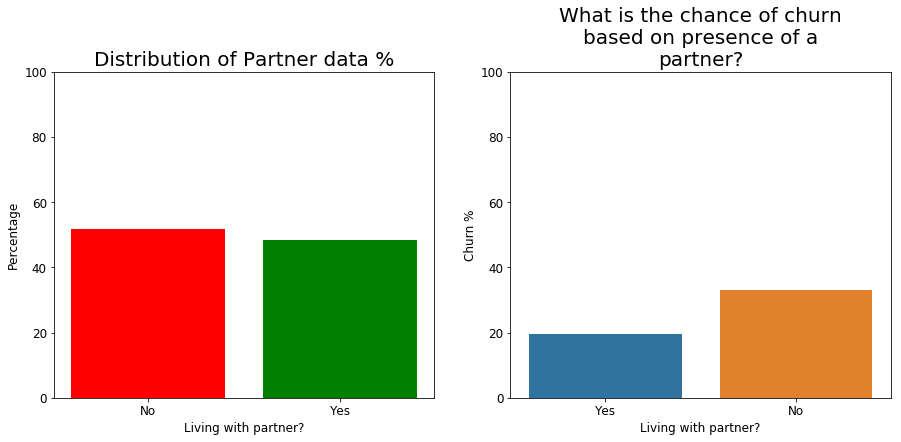

In [73]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = train_data["Partner"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Partner data %')
axes1.set_xlabel('Living with partner?')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Partner", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Living with partner?')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of a partner?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* The dataset contains almost equal distribution of customer data - either living alone or with partner.
* Customers living alone tend to churn more (~35% vs ~20%).

### Dependents
Does the customer have dependents?

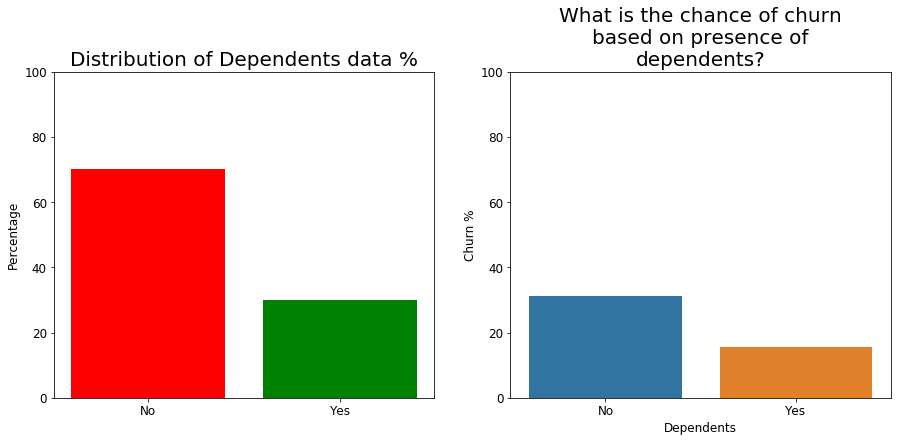

In [72]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = train_data["Dependents"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Dependents data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Dependents", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of dependents?', 30)))
axes2.set_ylim(0,100)

plt.show()

#### Observations:
* The dataset contains almost 70% customers who does not have a dependent, while 30% has one or more dependents.
* Customers without depedents tend to churn more (~30% vs ~20%).
* From Partner and Dependents data we can conclude that - customers who are single/independent, i.e. without partners or dependents tend to leave the CSP more, while customers with partner and/or dependents, usually continue with the same CSP.

### tenure
For how long have the customer been with this CSP

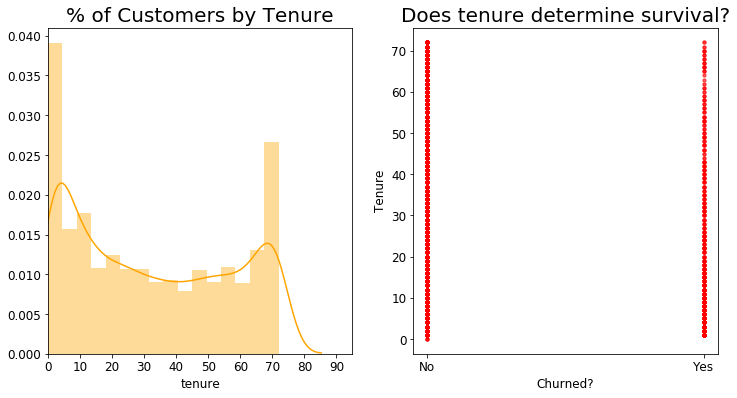

In [123]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(12,6))

# Plot tenure occurance
sns.distplot(train_data.tenure, color='orange', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(train_data.Churn, train_data.tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Does tenure determine churn?')

plt.show()

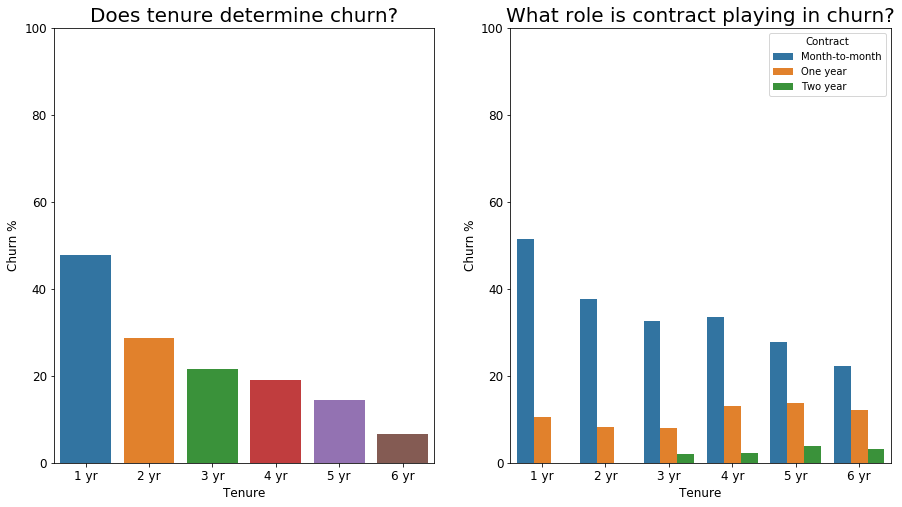

In [140]:
# Divide the ages into bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
train_data['tenureGroup'] = pd.cut(train_data["tenure"], bins, labels=labels)

# Draw a bar plot of tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,8))
sns.barplot(x="tenureGroup", y=train_data.ChurnVal*100, data=train_data, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

# Draw a bar plot of Age vs. survival
sns.barplot(x="tenureGroup", y=train_data.ChurnVal*100, hue="Contract", data=train_data, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is contract playing in churn?')


plt.show()

In [12]:
train_data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64